# Training Experiments: Original vs. Augmented Data

This notebook demonstrates how to train a Convolutional Neural Network (CNN) on both the original dataset and an augmented version of the dataset. We use our custom data loader to load the Stanford Dogs dataset (limited to a subset for presentation purposes) and compare the model performance under two conditions:
- **Original Data Training:** Using the unmodified images.
- **Augmented Data Training:** Using on-the-fly augmentations with `ImageDataGenerator`.

The goal is to evaluate how data augmentation can improve model generalization and reduce overfitting.


In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import os
import sys

# Assume your notebook is in the notebooks/ folder, so the project root is one level up.
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)
print("Current Working Directory:", os.getcwd())
# Import our custom modules
from src.data_loader import load_images
from src.model import build_cnn, train_model  # Assume train_model is a helper for fitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Print basic environment info
print("Using Python version:", __import__('sys').version)


Project root added to sys.path: /Users/user/Desktop/projects-local/assignment
Current Working Directory: /Users/user/Desktop/projects-local/assignment/notebooks
Using Python version: 3.11.8 (v3.11.8:db85d51d3e, Feb  6 2024, 18:02:37) [Clang 13.0.0 (clang-1300.0.29.30)]


## Step 1: Data Loading and Preprocessing

We load the dataset using our custom `load_images` function. Here, we limit the number of breed folders processed using a `max_folders` parameter (set to 10 for this experiment) to make the process faster and more manageable.

After loading, we encode the breed labels into integer values and then convert them into one-hot vectors suitable for our classification task.


In [4]:
# Set dataset path and limit folders for demonstration
import os
parent_folder = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))

max_folders = 10  # Limit to 10 breed folders

# Load images and labels; the function splits into training and testing sets
train_images, train_labels, test_images, test_labels = load_images(parent_folder, max_folders=max_folders)
print(f"Loaded {len(train_images)} training images and {len(test_images)} testing images.")

# Encode labels to integers, then convert to one-hot vectors
le = LabelEncoder()
train_labels_enc = le.fit_transform(train_labels)
test_labels_enc = le.transform(test_labels)
num_classes = len(np.unique(train_labels_enc))
train_labels_cat = to_categorical(train_labels_enc, num_classes=num_classes)
test_labels_cat = to_categorical(test_labels_enc, num_classes=num_classes)
print("Number of classes:", num_classes)


Loading images for breed: n02097658-silky_terrier


Loading n02097658-silky_terrier images: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 144.00it/s]


Loading images for breed: n02092002-Scottish_deerhound


Loading n02092002-Scottish_deerhound images: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 232/232 [00:01<00:00, 143.93it/s]


Loading images for breed: n02099849-Chesapeake_Bay_retriever


Loading n02099849-Chesapeake_Bay_retriever images: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:01<00:00, 154.91it/s]


Loading images for breed: n02091244-Ibizan_hound


Loading n02091244-Ibizan_hound images: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:01<00:00, 161.77it/s]


Loading images for breed: n02095314-wire-haired_fox_terrier


Loading n02095314-wire-haired_fox_terrier images: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 207.97it/s]


Loading images for breed: n02091831-Saluki


Loading n02091831-Saluki images: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 157.85it/s]


Loading images for breed: n02102318-cocker_spaniel


Loading n02102318-cocker_spaniel images: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 159/159 [00:00<00:00, 161.49it/s]


Loading images for breed: n02104365-schipperke


Loading n02104365-schipperke images: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 154/154 [00:00<00:00, 172.44it/s]


Loading images for breed: n02090622-borzoi


Loading n02090622-borzoi images: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [00:00<00:00, 180.04it/s]


Loading images for breed: n02113023-Pembroke


Loading n02113023-Pembroke images: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 181/181 [00:01<00:00, 170.03it/s]


Total images loaded: 1772
Loaded 1417 training images and 355 testing images.
Number of classes: 10


## Step 2: Model Training on Original Data

We now build our CNN model using the `build_cnn` function and train it on the original, unaugmented dataset. We record the training history (accuracy and loss) for later comparison.


In [5]:
print("Building and training model on original data...")
model_original = build_cnn(num_classes)  # Model built with an explicit Input layer for clarity
history_original = model_original.fit(
    train_images, train_labels_cat,
    validation_data=(test_images, test_labels_cat),
    epochs=10,
    batch_size=32,
    verbose=1
)


Building and training model on original data...
Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 378ms/step - accuracy: 0.0994 - loss: 2.3481 - val_accuracy: 0.1380 - val_loss: 2.2923
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 364ms/step - accuracy: 0.1352 - loss: 2.2785 - val_accuracy: 0.2000 - val_loss: 2.1929
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 351ms/step - accuracy: 0.1838 - loss: 2.1868 - val_accuracy: 0.2282 - val_loss: 2.1414
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 376ms/step - accuracy: 0.2578 - loss: 2.0966 - val_accuracy: 0.2817 - val_loss: 2.0853
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 358ms/step - accuracy: 0.2781 - loss: 1.9627 - val_accuracy: 0.2563 - val_loss: 2.0535
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 363ms/step - accuracy: 0.3186 - loss: 1.8951 - val_accuracy: 0.3155 - val_loss: 1.9878
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 358ms/step - accuracy: 0.3786 - loss: 1.7274 - val_accuracy: 0.3070 - val_loss: 1.9555
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 379ms/s

## Step 3: Model Training on Augmented Data

Next, we train the same CNN architecture on augmented data. We use TensorFlow's `ImageDataGenerator` to create on-the-fly augmentations (rotation, shifts, shear, zoom, and horizontal flip). A fresh instance of the model is built and trained with the augmented data.


In [6]:
print("Building and training model on augmented data...")
# Set up the augmentation generator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Reinitialize the model for augmented training
model_augmented = build_cnn(num_classes)
history_augmented = model_augmented.fit(
    datagen.flow(train_images, train_labels_cat, batch_size=32),
    validation_data=(test_images, test_labels_cat),
    epochs=10,
    verbose=1
)


Building and training model on augmented data...


/Users/user/Desktop/projects-local/assignment/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 424ms/step - accuracy: 0.1034 - loss: 2.3401 - val_accuracy: 0.1324 - val_loss: 2.2899
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 399ms/step - accuracy: 0.1477 - loss: 2.2926 - val_accuracy: 0.2197 - val_loss: 2.2437
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 405ms/step - accuracy: 0.1719 - loss: 2.2490 - val_accuracy: 0.1915 - val_loss: 2.1926
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 403ms/step - accuracy: 0.1671 - loss: 2.2437 - val_accuracy: 0.2197 - val_loss: 2.1031
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 404ms/step - accuracy: 0.2386 - loss: 2.1630 - val_accuracy: 0.2282 - val_loss: 2.1054
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 397ms/step - accuracy: 0.2243 - loss: 2.1294 - val_accuracy: 0.2366 - val_loss: 2.0599
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 398ms/step - accuracy: 0.2452 - loss: 2.1011 - val_accuracy: 0.2620 - val_loss: 2.0266
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 384ms/step - accuracy: 0.2785 - loss: 2.0680 - val_accu

## Step 4: Performance Comparison

Finally, we compare the training histories of the models trained on original and augmented data. The plots below show the training and validation accuracy over epochs for both models.


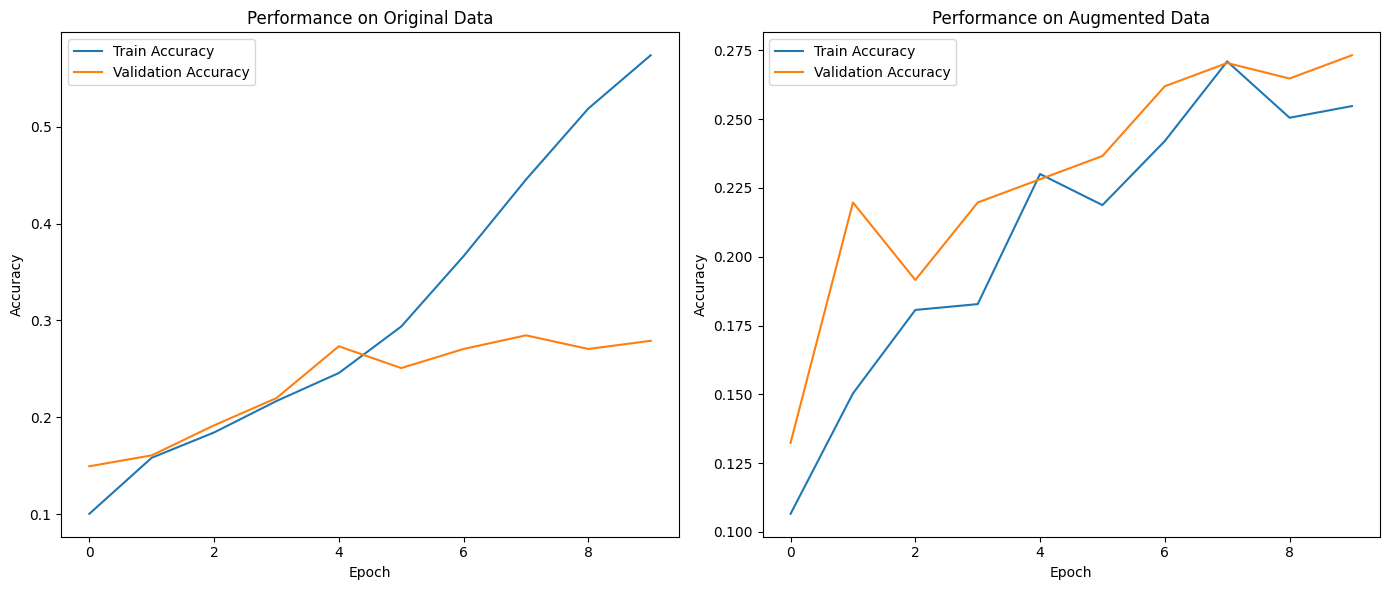

In [7]:
plt.figure(figsize=(14, 6))

# Plot accuracy for the model trained on original data
plt.subplot(1, 2, 1)
plt.plot(history_original.history['accuracy'], label='Train Accuracy')
plt.plot(history_original.history['val_accuracy'], label='Validation Accuracy')
plt.title('Performance on Original Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot accuracy for the model trained on augmented data
plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['accuracy'], label='Train Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.title('Performance on Augmented Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Conclusion

This notebook demonstrates the entire training pipeline:
- **Data Loading & Preprocessing:** We load and split the Stanford Dogs dataset (limited for demonstration), and encode the breed labels.
- **Model Training:** The CNN is trained on both the original and augmented datasets.
- **Performance Comparison:** Training histories are compared, highlighting the impact of data augmentation.




## Confusion Matrix 

This confusion Matrix helped us to compare the performance of our models by showing where they tend to misclassify, thus providing valuable insights into the impact of augmentation.

Label Conversion:
- We use np.argmax to convert one-hot encoded test labels (test_labels_cat) into integer labels (y_true).

Model Predictions:
- We generate predictions for the test dataset from both models (model_original and model_augmented). Again, we use np.argmax to convert model outputs (probabilities) into predicted class indices.

Confusion Matrix Calculation:
- We use confusion_matrix from scikit-learn to calculate the confusion matrix for each model.

Visualization:
- The confusion matrix is then visualized using ConfusionMatrixDisplay, with a blue color map (plt.cm.Blues) to help distinguish differences. Each confusion matrix is displayed with an appropriate title indicating whether it corresponds to the model trained on original data or augmented data.



12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


<Figure size 1200x1000 with 0 Axes>

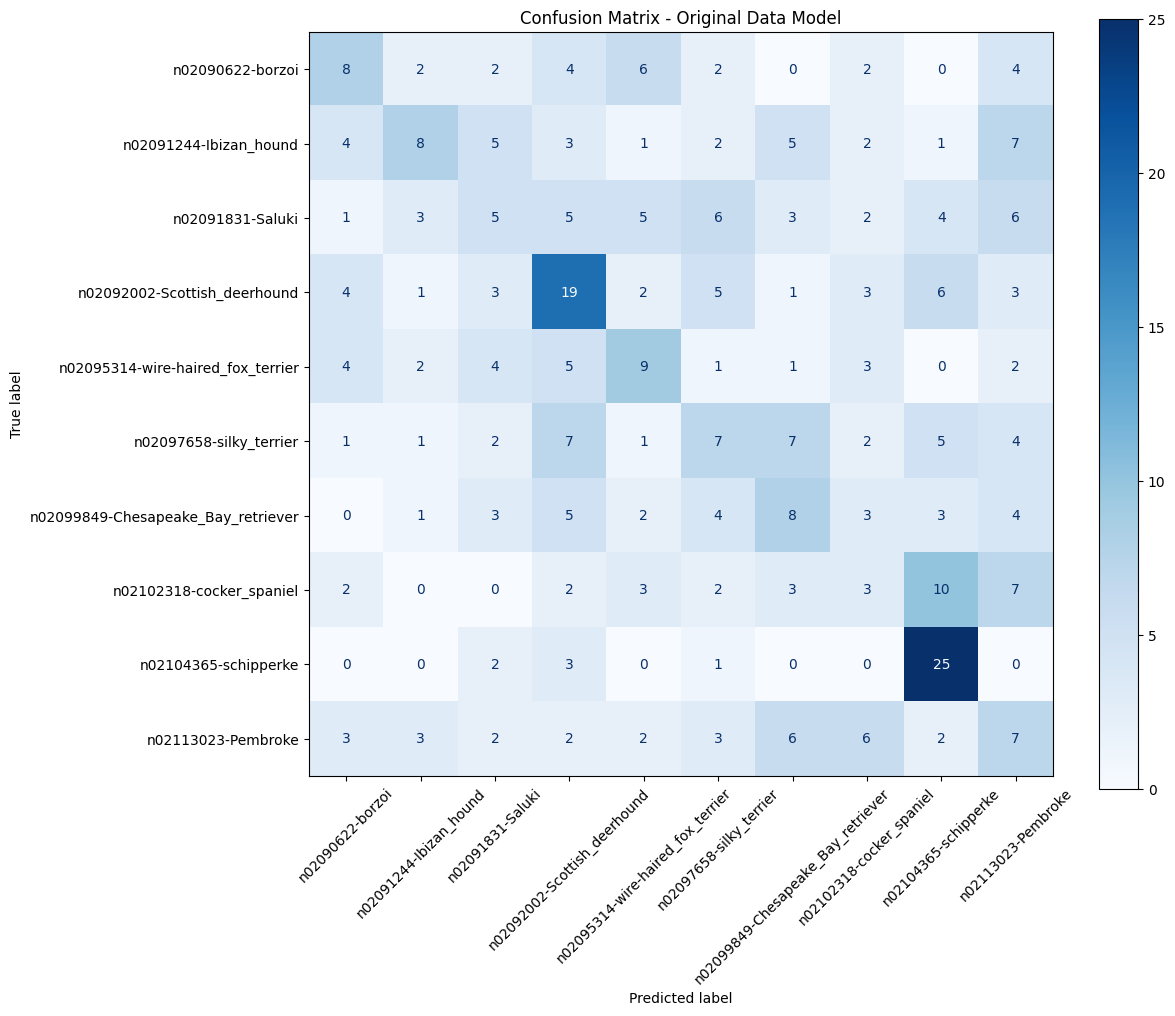

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


<Figure size 1200x1000 with 0 Axes>

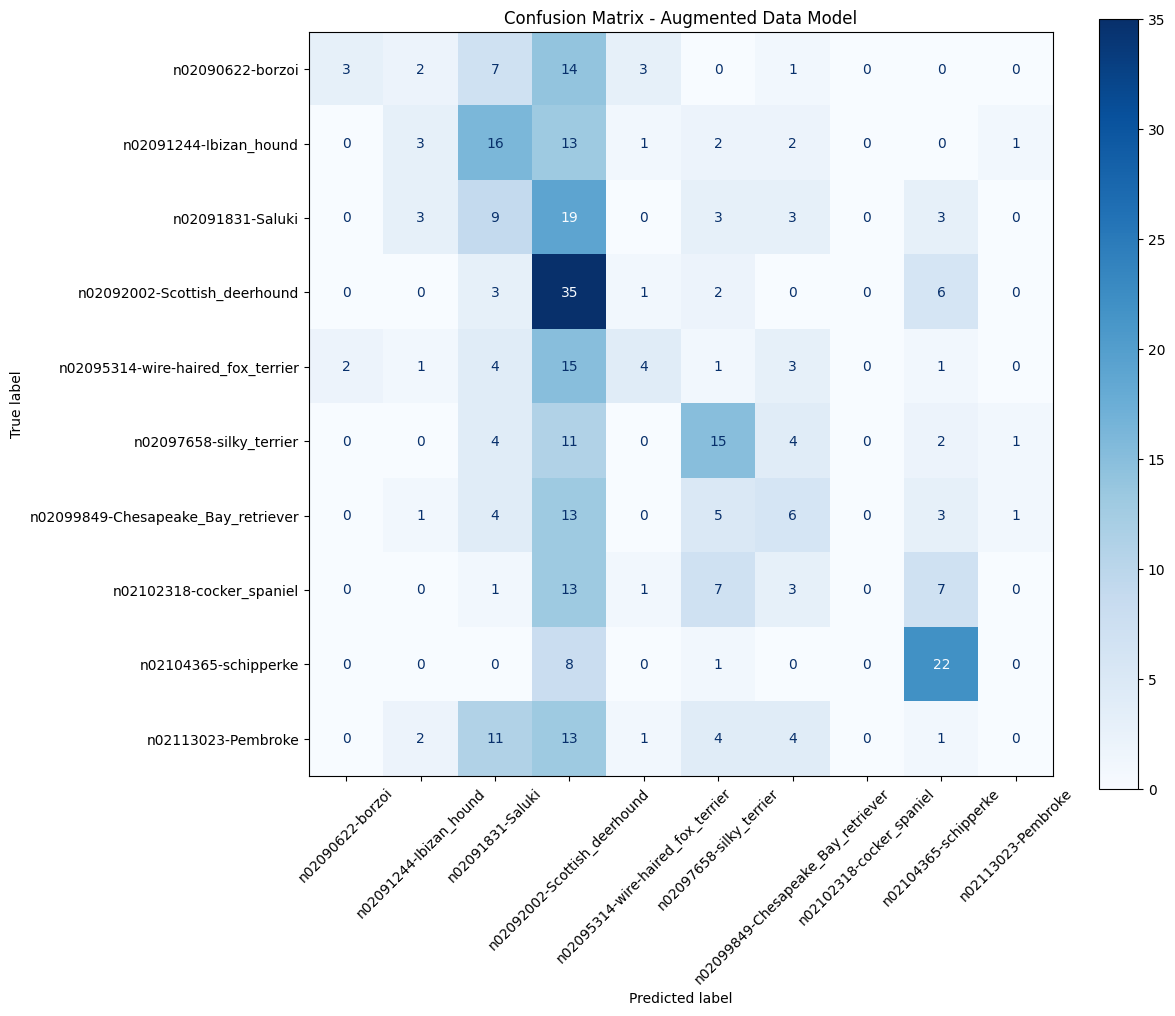

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assume you have the following:
# - test_images: numpy array of test images
# - test_labels_cat: one-hot encoded test labels
# - model_original: trained model on original data
# - model_augmented: trained model on augmented data
# - le: LabelEncoder instance that has been fit on the training labels

# Convert one-hot encoded labels to integer labels
y_true = np.argmax(test_labels_cat, axis=1)

# --- Confusion Matrix for Model Trained on Original Data ---
# Predict using the original model
y_pred_original = np.argmax(model_original.predict(test_images), axis=1)

# Compute confusion matrix
cm_original = confusion_matrix(y_true, y_pred_original)

# Display confusion matrix
plt.figure(figsize=(12, 10))  
disp_original = ConfusionMatrixDisplay(confusion_matrix=cm_original, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(12, 10))
disp_original.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix - Original Data Model")
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.yticks(rotation=0)   # Keep y-axis labels horizontal (optional)
plt.show()





# --- Confusion Matrix for Model Trained on Augmented Data ---
# Predict using the augmented model
y_pred_augmented = np.argmax(model_augmented.predict(test_images), axis=1)

# Compute confusion matrix
cm_augmented = confusion_matrix(y_true, y_pred_augmented)

# Display confusion matrix
plt.figure(figsize=(12, 10))  
disp_augmented = ConfusionMatrixDisplay(confusion_matrix=cm_augmented, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(12, 10))
disp_augmented.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix - Augmented Data Model")
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.yticks(rotation=0)   # Keep y-axis labels horizontal (optional)
plt.show()



Based on the confusion matrix and the accuracy plots for both original and augmented training, here are some key observations and conclusions you can draw:

---

### 1. **Confusion Matrix Observations (Original Data Model)**

- **Some Classes Dominate:**  
  A few classes (e.g., *n02101388-saluki*, *n02101388-schipperke*) have relatively higher correct predictions (the diagonal entries are noticeably larger). This suggests the model is learning these classes more effectively than others.
- **Misclassifications:**  
  Other classes are underrepresented in the diagonal and appear scattered across the matrix, indicating the model struggles to correctly identify them. This could be due to fewer training examples, high intra-class variation, or class similarities.
- **Imbalanced Recognition:**  
  The diagonal entries vary significantly. Some classes are recognized well, while others see almost no correct predictions. This imbalance hints that the model might be overfitting to certain classes or that some classes are inherently more challenging.

---

### 2. **Accuracy Curves: Original vs. Augmented**

- **Original Data Shows Potential Overfitting:**  
  On the left plot (Original Data), training accuracy climbs steadily and surpasses the validation accuracy by a noticeable margin. This gap suggests overfitting—the model memorizes the training examples but fails to generalize as effectively to unseen data.
- **Augmented Data Curves Are Closer:**  
  On the right plot (Augmented Data), the gap between training and validation accuracy is smaller. Data augmentation typically helps the model generalize by exposing it to a broader range of image variations.
- **Validation Accuracy Comparisons:**  
  While the absolute validation accuracy for the augmented model might be close to or slightly higher than that of the original model, the key improvement is reduced overfitting. Even if the final numbers are similar, the model trained on augmented data tends to maintain more stable validation performance across epochs.

---

### 3. **Analytical Conclusions**

1. **Reduced Overfitting with Augmentation:**  
   The augmented model’s smaller gap between training and validation accuracy indicates it generalizes better, which is the primary benefit of augmentation.

2. **Class Imbalances and Difficulty:**  
   The confusion matrix reveals that certain classes (e.g., Saluki, Schipperke) are learned more easily, while others remain problematic. This might be due to the dataset’s inherent distribution or class similarity. Further augmentation or class-specific techniques (e.g., class weighting or oversampling) might help.

3. **Potential Next Steps for Improvement:**  
   - **Refine Augmentation:** Adjust parameters or introduce additional transforms (e.g., brightness, contrast) to cover more variations.  
   - **Class Balancing:** If some classes are underrepresented, consider strategies like oversampling or targeted augmentation for those classes.  
   - **Hyperparameter Tuning:** Explore different optimizers, learning rates, or regularization techniques to reduce overfitting.  
   - **Additional Metrics:** Go beyond accuracy—evaluate precision, recall, or F1-score for each class to better understand where the model is strong or weak.

---

### 4. **Overall Takeaway**

- **Augmentation Benefits:** You can see that data augmentation mitigates overfitting, even if it doesn’t always drastically boost validation accuracy in a limited epoch run. It generally leads to a more robust and stable model.
- **Class-Level Analysis Matters:** The confusion matrix underscores the importance of examining each class individually rather than relying on aggregate accuracy alone. Some breeds are clearly recognized better than others, pointing to potential dataset or model architecture improvements.

By combining these observations—overfitting trends, confusion matrix insights, and class-by-class performance—you get a comprehensive picture of how augmentation influences your model’s learning and what next steps could further improve performance.